### Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import os
import matplotlib.pyplot as plt
import itertools
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
np.random.seed(2)

### Data processing

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


#### Scale data

##### run below to understand the error

In [4]:
# scaler = StandardScaler()
# data['NormalizedAmount'] = scaler.fit_transform(data['Amount'])

In [5]:
scaler = StandardScaler()
data['NormalizedAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

#### Split data

In [6]:
data = data.drop(['Amount', 'Time'], axis = 1)
y = data['Class']
X = data.drop(['Class'], axis = 1)

In [7]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Convert data

In [9]:
train_identity = X_train.index
test_identity = X_test.index

In [10]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### Deep neural network

####  Create model

In [11]:
model = Sequential()
#add input layer
model.add(Dense(input_dim = 29, units = 16, activation = 'relu'))
#add 2nd hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add dropout layer
model.add(Dropout(0.5))
#add 3rd hidden layer
model.add(Dense(units = 20, activation = 'relu'))
#add 4th hidden layer
model.add(Dense(units = 24, activation = 'relu'))
#add ouptut layer
model.add(Dense(units = 1, activation = 'sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

####  Fit model

In [13]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
13291/13291 [==============================] - 14s 1ms/step - loss: 0.0093 - accuracy: 0.9981
Epoch 2/5
13291/13291 [==============================] - 15s 1ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 14s 1ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 13s 1ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 13s 994us/step - loss: 0.0032 - accuracy: 0.9994


### Model test

In [14]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 2s 822us/step - loss: 0.0037 - accuracy: 0.9994
[0.0036759674549102783, 0.9993680119514465]


In [15]:
y_pred = model.predict(X_test)

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.GnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [17]:
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[85275    21]
 [   33   114]]


Confusion matrix, without normalization


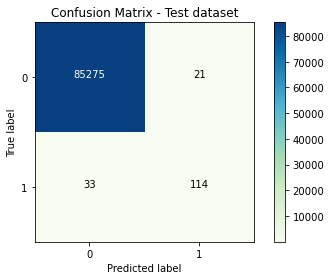

In [18]:
plot_confusion_matrix(cm, classes = [0,1], title='Confusion Matrix - Test dataset')

In [19]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))

0.9993679997191109
0.8444444444444444
0.7755102040816326
0.8085106382978723
